In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("data_regression.csv")

In [4]:
X = df.drop(['Price'], axis = 1)
y= df.Price
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [5]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [6]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)>

In [7]:
pred =rf.predict(X_test)
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Root Mean Square Error: 320603.9505345671


In [8]:
from tabulate import tabulate
headers = ["name", "score"]
values = sorted(zip(X_train.columns, rf.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="pretty"))

+--------------------------------------------+------------------------+
|                    name                    |         score          |
+--------------------------------------------+------------------------+
|      Regionname_Southern Metropolitan      |  0.22260231322021623   |
|                   Rooms                    |  0.17146510559407865   |
|                  Distance                  |  0.15062931463541437   |
|                  Landsize                  |  0.08633786196087781   |
|                 Longtitude                 |  0.07641770621268287   |
|                 Lattitude                  |  0.05805556522667351   |
|                   Type_u                   |  0.050980764938591105  |
|                   month                    |  0.02809422705656143   |
|      Regionname_Eastern Metropolitan       |  0.026808105821875594  |
|                   Type_h                   |  0.02590558246253618   |
|                  Bathroom                  |  0.02556425216730

In [9]:
#Parameter Tuning

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [10]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 5)]
max_depth = [int(x) for x in np.linspace(10, 500, num = 5)]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
random_grid

{'n_estimators': [10, 107, 205, 302, 400],
 'max_depth': [10, 132, 255, 377, 500]}

In [11]:
error_depth = []
from sklearn.ensemble import RandomForestRegressor
for d in max_depth:
#for d in n_estimators:
    print(d)
    rf_best = RandomForestRegressor(random_state = 42,max_depth=d )  #For max_depth
    #rf_best = RandomForestRegressor(random_state = 42,n_estimators = d )  #For n_estimators
    rf_best.fit(X_train, y_train)
    predictions_best=rf_best.predict(X_test)
    error_depth.append( metrics.mean_squared_error(y_test, predictions_best))

10
132
255
377
500


In [12]:
import matplotlib.pyplot as plt
from scipy import stats

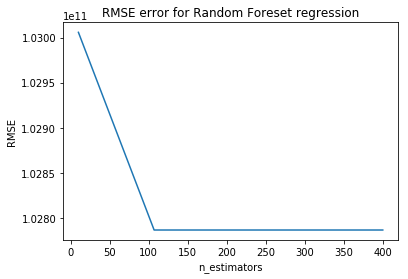

In [13]:
ax = plt.gca()
ax.plot(n_estimators, error_depth)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE error for Random Foreset regression')
plt.axis('tight')
plt.show()

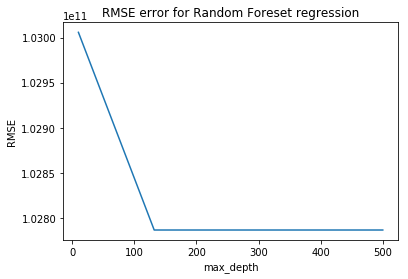

In [14]:
ax = plt.gca()
ax.plot(max_depth, error_depth)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE error for Random Foreset regression')
plt.axis('tight')
plt.show()

In [15]:
# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [10, 107, 205, 302, 400], 'max_depth': [10, 132, 255, 377, 500]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [16]:
rf_random.best_params_

{'n_estimators': 205, 'max_depth': 132}

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf_best = RandomForestRegressor(max_depth =  500, n_estimators =  205)
rf_best.fit(X_train, y_train)
predictions_best=rf_best.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predictions_best))

303385.9115515846

In [18]:
train_sizes = [1, 100, 500, 1000, 2500, 5000]
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = RandomForestRegressor(max_depth =  500, n_estimators =  205), X = X_train,
                                                   y = y_train, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

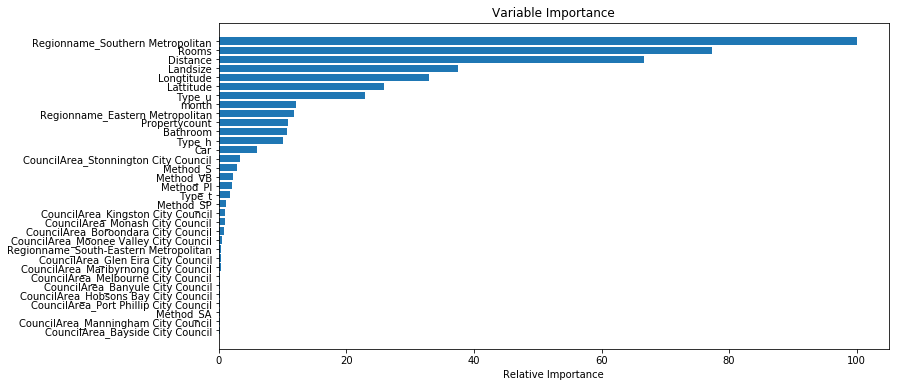

In [19]:
feature_importance = rf_best.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos[25:], feature_importance[sorted_idx][25:], align='center')
plt.yticks(pos[25:], X.columns[sorted_idx][25:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [20]:
pos

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
       22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
       33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
       44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
       55.5, 56.5, 57.5])

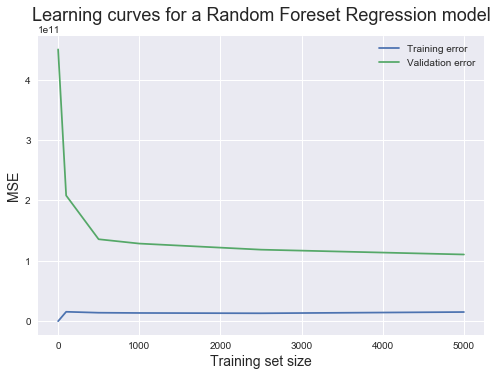

In [21]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Random Foreset Regression model', fontsize = 18, y = 1.03)
plt.legend()